C:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


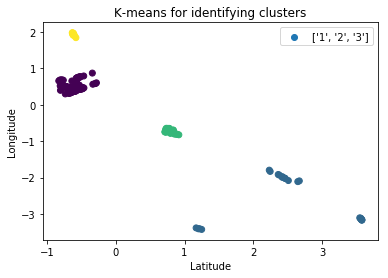

In [15]:
%matplotlib inline
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.vq import kmeans, vq

#Read data
df = pd.read_csv('data.csv')

# Scaling data
std_scaler = StandardScaler()
scaled = std_scaler.fit_transform(df)
df['x_scaled'] =scaled[:,1]
df['y_scaled'] =scaled[:,2]



# Form cluster centers
cluster_centers, distortion = kmeans(df[['x_scaled', 'y_scaled']], 4)

# cluster_Id
df['cluster_center_id'], distortion_list = vq(df[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
plt.scatter(df['x_scaled'],df['y_scaled'], 
                c=df['cluster_center_id'])
plt.title("K-means for identifying clusters")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend()
plt.show()
